# Installation Guide for Windows 11:
1. Install pip
2. Install python 3.9
3. Install VSCode and install venv

### To run venv we need to initiate the following command:
Set-ExecutionPolicy Unrestricted -Scope Process

### Enter the following code to initialize the Virtual Environment Testenv:
 - & "d:/Linkedin Learning/PythonTraining/Testenv/Scripts/Activate.ps1"
 - & "d:/Linkedin Learning/PythonTraining/Testenv/Scripts/python.exe" "d:/Linkedin Learning/PythonTraining/Time_Series_Analysis/Time_Series.py"

#### If we have to install GPU we need to follow the following: 
 - Install Visual Studio (2019) for Windows 10/11 for CUDA and CUDANN
 - After Visual Studio installation install CUDA (11.2) for 2019 as we can't install any other version as they are not compatible
 - Download CUDANN and extract the 3 files /bin, /lib, /include and copy them and replace them with the folders of CUDA GPU Toolkit
 - C:Users/Program Files/NVIDIA GPU Toolkit /CUDA.11/ 
 - Add the path of  C:Users/Program Files/NVIDIA GPU Toolkit /CUDA.11/bin folder as a path and save
 - Add the path of  C:Users/Program Files/NVIDIA GPU Toolkit /CUDA.11/libmnrv folder as a path and save

#### After installing GPU we need to add the following line to your code in the beginning if using VSCode:
 - import os 
 - os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")

In [3]:
from pickle import GLOBAL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
import tensorflow as tf
import csv

def main():
    path = "./Telangana_Industries_TS_IPass"
    #data = pd.read_csv("D:\Linkedin Learning\PythonTraining\Time_Series_Analysis\TS_Civil_Shop_Transactions\shop_status_details_01-01-2018 to 31-12-2018.csv")
    files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

    print('Files:',files)


    all_time_data = pd.DataFrame()

    for file in files:
        current_data = pd.read_csv(path+"/"+file)
        all_time_data = pd.concat([all_time_data, current_data])
        
    all_time_data.to_csv("all_time_data_copy.csv", index=False)
    
    print(all_time_data.head())
    return all_time_data
if __name__ == "__main__":
    all_time_data = main()

Files: ['ts_industry_tsipass_01-01-2022_31-01-2022.csv', 'ts_industry_tsipass_01-02-2022_28-02-2022.csv', 'ts_industry_tsipass_01-03-2022_31-03-2022.csv', 'ts_industry_tsipass_01-04-2017_31-03-2018.csv', 'ts_industry_tsipass_01-04-2018_31-03-2019.csv', 'ts_industry_tsipass_01-04-2019_31-03-2020.csv', 'ts_industry_tsipass_01-04-2020_31-03-2021.csv', 'ts_industry_tsipass_01-04-2021_30-04-2021.csv', 'ts_industry_tsipass_01-04-2022_30-04-2022.csv', 'ts_industry_tsipass_01-05-2021_31-05-2021.csv', 'ts_industry_tsipass_01-05-2022_31-05-2022.csv', 'ts_industry_tsipass_01-06-2021_30-06-2021.csv', 'ts_industry_tsipass_01-06-2022_30-06-2022.csv', 'ts_industry_tsipass_01-07-2021_31-07-2021.csv', 'ts_industry_tsipass_01-07-2022_31-07-2022.csv', 'ts_industry_tsipass_01-08-2021_31-08-2021.csv', 'ts_industry_tsipass_01-09-2021_30-09-2021.csv', 'ts_industry_tsipass_01-10-2021_31-10-2021.csv', 'ts_industry_tsipass_01-11-2021_30-11-2021.csv', 'ts_industry_tsipass_01-12-2021_31-12-2021.csv']
  district_n

In [5]:
all_time_data.describe()

,investment,number_of_employees
count,17282.000000,17282.000000
mean,10.028852,85.607858
std,220.522794,1756.857363
min,0.000000,0.000000
25%,0.140000,5.000000
50%,0.250000,9.000000
75%,1.029700,18.000000
max,25099.400000,187539.000000


In [7]:
all_time_data.shape

(17282, 18)

In [8]:
all_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17282 entries, 0 to 359
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   district_name               4316 non-null   object 
 1   mandal_name                 4316 non-null   object 
 2   village_name                4316 non-null   object 
 3   name_of_the_unit            4316 non-null   object 
 4   line_of_activity            17282 non-null  object 
 5   sector                      17279 non-null  object 
 6   investment                  17282 non-null  float64
 7   number_of_employees         17282 non-null  int64  
 8   application_date            17282 non-null  object 
 9   approval_date               17282 non-null  object 
 10  progress_of_implementation  17282 non-null  object 
 11  is_online                   4316 non-null   object 
 12  social_status               17282 non-null  object 
 13  district                    12966

In [9]:
all_time_data.describe( )

,investment,number_of_employees
count,17282.000000,17282.000000
mean,10.028852,85.607858
std,220.522794,1756.857363
min,0.000000,0.000000
25%,0.140000,5.000000
50%,0.250000,9.000000
75%,1.029700,18.000000
max,25099.400000,187539.000000


In [23]:
all_time_data.isnull( ).sum( )

district_name                 12966
mandal_name                   12966
village_name                  12966
name_of_the_unit              12966
line_of_activity                  0
sector                            3
investment                        0
number_of_employees               0
application_date                  0
approval_date                     0
progress_of_implementation        0
is_online                     12966
social_status                     0
district                       4316
mandal                         4316
village                        4316
unit_name                      4316
in_online                      4316
dtype: int64

In [24]:
all_time_data.nunique()

district_name                    35
mandal_name                     479
village_name                   1617
name_of_the_unit               3965
line_of_activity                270
sector                           20
investment                     4107
number_of_employees             283
application_date               2076
approval_date                  1783
progress_of_implementation        5
is_online                         1
social_status                     4
district                         34
mandal                          535
village                        2850
unit_name                     12158
in_online                         1
dtype: int64

In [25]:
data_cols = list(all_time_data.columns)
data_cols

['district_name',
 'mandal_name',
 'village_name',
 'name_of_the_unit',
 'line_of_activity',
 'sector',
 'investment',
 'number_of_employees',
 'application_date',
 'approval_date',
 'progress_of_implementation',
 'is_online',
 'social_status',
 'district',
 'mandal',
 'village',
 'unit_name',
 'in_online']

In [89]:

all_time_data['application_date'] = pd.to_datetime(all_time_data['application_date'])
all_time_data['approval_date'] = pd.to_datetime(all_time_data['approval_date'])

print(all_time_data.dtypes)
#all_time_data['number_of_employees'] = pd.to_numeric(all_time_data['number_of_employees'])



district_name                         object
mandal_name                           object
village_name                          object
name_of_the_unit                      object
line_of_activity                      object
sector                                object
investment                           float64
number_of_employees                    int64
application_date              datetime64[ns]
approval_date                 datetime64[ns]
progress_of_implementation            object
is_online                             object
social_status                         object
district                              object
mandal                                object
village                               object
unit_name                             object
in_online                             object
Year                                   int64
dtype: object


In [76]:
all_time_data.sort_values(by='application_date', inplace=True)
all_time_data['Year'] = pd.to_datetime(all_time_data['application_date']).dt.year
all_time_data.head()

,district_name,mandal_name,village_name,name_of_the_unit,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,is_online,social_status,district,mandal,village,unit_name,in_online,Year
1987,NaN,NaN,NaN,NaN,Stone crushers,Granite and Stone Crushing,0.270,15,2016-01-07,2017-08-22,COMMENCED OPERATIONS,NaN,OBC,Peddapalli,Dharmaram,Myadaram,M/S.SRI ANABHASKARA AGRO FARMS PVT LTD,Yes,2016
1731,NaN,NaN,NaN,NaN,Ferrous and Non- ferrous metal extraction invo...,Engineering,1.200,50,2016-01-07,2017-08-22,COMMENCED OPERATIONS,NaN,General,Rangareddy,Nandigama,Chegur,M/s. MAHALAKSHMI ALLOYS & METALS PVT. LTD,Yes,2016
2379,NaN,NaN,NaN,NaN,Stone crushers,Granite and Stone Crushing,0.250,30,2016-01-08,2019-06-29,COMMENCED OPERATIONS,NaN,General,Karimnagar,Karimnagar,Asifnagar,M/S.NEW KARIMNAGAR STONE CRUSHER,Yes,2016
1787,NaN,NaN,NaN,NaN,Solar power generation through solar photovolt...,Solar and Other Renewable Energy,113.250,30,2016-01-09,2017-08-22,COMMENCED OPERATIONS,NaN,General,Nalgonda,Kattangoor,Munukuntla,Narbheram Vishram,Yes,2016
1986,NaN,NaN,NaN,NaN,Stone crushers,Granite and Stone Crushing,4.983,16,2016-01-09,2017-08-22,COMMENCED OPERATIONS,NaN,General,Khammam,Tallada,Annargudem,M/S. MSR CONSTRUCTIONS,Yes,2016


# Question1

## How many new industries opened each year in Telangana ?

In [83]:
all_time_data.groupby(['Year']).sum()


,investment,number_of_employees
Year,,
2016,6301.4626,33965
2017,51973.3460,250698
2018,42393.3583,668681
2019,15744.5405,311201
2020,30342.4432,83972
2021,15268.9941,86099
2022,11294.4759,44859


range(2016, 2023)


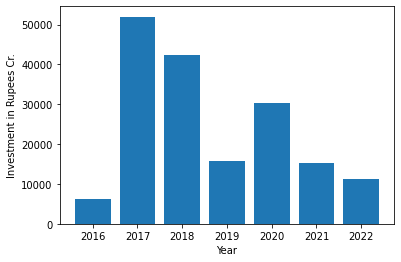

In [81]:
import matplotlib.pyplot as plt

years = range(2016,2023)
print(years)

plt.bar(years,all_time_data.groupby(['Year']).sum()['investment'])
plt.xticks(years)
plt.ylabel('Investment in Rupees Cr.')
plt.xlabel('Year')
plt.show()

In [85]:
all_time_data.groupby(['social_status']).sum()

,investment,number_of_employees,Year
social_status,,,
General,136154.8308,1406713,20600293
OBC,5478.4315,56374,11675858
SC,25488.3342,10311,1373238
ST,6197.0241,6077,1252255


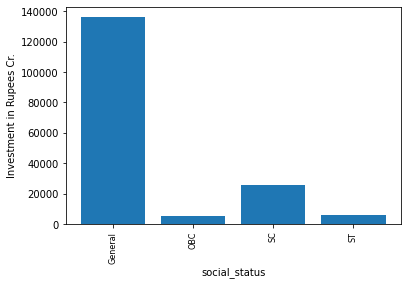

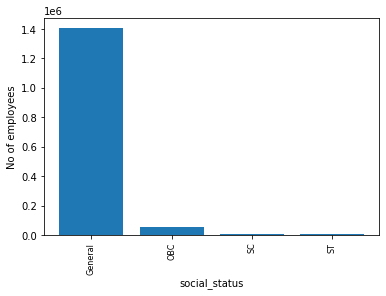

In [87]:
social_status_keys = [status for status, all_time_data in all_time_data.groupby(['social_status'])]

plt.bar(social_status_keys,all_time_data.groupby(['social_status']).sum()['investment'])
plt.ylabel('Investment in Rupees Cr.')
plt.xlabel('social_status')
plt.xticks(social_status_keys, rotation='vertical', size=8)
plt.show()

plt.bar(social_status_keys,all_time_data.groupby(['social_status']).sum()['number_of_employees'])
plt.ylabel('No of employees')
plt.xlabel('social_status')
plt.xticks(social_status_keys, rotation='vertical', size=8)
plt.show()

In [110]:
all_time_data['application_date'] = pd.to_datetime(all_time_data['application_date'])
all_time_data['approval_date'] = pd.to_datetime(all_time_data['approval_date'])

all_time_data['Time Taken'] = all_time_data['approval_date']-all_time_data['application_date']
all_time_data.tail()

,district_name,mandal_name,village_name,name_of_the_unit,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,is_online,social_status,district,mandal,village,unit_name,in_online,Year,Time Taken
80,Rangareddy,Madgul,Madgul,Dodla Dairy Limited,Chilling plant and ice making without using am...,Agro based incl Cold Storages,0.2900,8,2022-12-07,2022-07-23,Yet to Start Construction,Yes,General,NaN,NaN,NaN,NaN,NaN,2022,-137 days
98,Rangareddy,Hayathnagar,Pedda Amberpet (Kalan),PRISMA INC,"Cutting, sizing and polishing of marble stone",Granite and Stone Crushing,0.2500,7,2022-12-07,2022-07-22,Yet to Start Construction,Yes,OBC,NaN,NaN,NaN,NaN,NaN,2022,-138 days
87,Vikarabad,Tandur,Goutapur,VANI STONE INDUSTRIES,"Cutting, sizing and polishing of marble stone",Granite and Stone Crushing,0.7782,16,2022-12-07,2022-07-23,Yet to Start Construction,Yes,General,NaN,NaN,NaN,NaN,NaN,2022,-137 days
81,Vikarabad,Bomraspet,Nagireddipalle,M/S VINAYAKA INDUSTRIES,Rice mill (Rice hullers only),Food Processing,0.4195,10,2022-12-07,2022-07-23,Yet to Start Construction,Yes,General,NaN,NaN,NaN,NaN,NaN,2022,-137 days
173,Sangareddy,Patancheru,Pashamylaram,VAJRA TRANSPOWER PRIVATE LIMITED,Transformer repairing/ manufacturing( dry proc...,Electrical and Electronic Products,0.9000,19,2022-12-07,2022-07-15,Yet to Start Construction,Yes,General,NaN,NaN,NaN,NaN,NaN,2022,-145 days


In [117]:
nan_df = all_time_data[all_time_data['sector'].isna()]
display(nan_df.head())

,district_name,mandal_name,village_name,name_of_the_unit,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,is_online,social_status,district,mandal,village,unit_name,in_online,Year,Time Taken
96,Medchal,Shamirpet,Kolthur,G.V. Research Centers Private Limited,"Industrial estates/ parks/ complexes/ areas, E...",NaN,0.50,10,2021-02-16,2021-12-17,Yet to Start Construction,Yes,General,NaN,NaN,NaN,NaN,NaN,2021,304 days
132,Medchal,Shamirpet,Turkapally,Crescentia Labs Private Limited,"Industrial estates/ parks/ complexes/ areas, E...",NaN,6.39,20,2022-01-01,2022-01-20,Yet to Start Construction,Yes,General,NaN,NaN,NaN,NaN,NaN,2022,19 days
60,Karimnagar,Karimnagar,Durshed,M/s. SRI VENKATESHWARA GODOWNS,"Industrial estates/ parks/ complexes/ areas, E...",NaN,0.25,12,2022-05-30,2022-06-24,Yet to Start Construction,Yes,OBC,NaN,NaN,NaN,NaN,NaN,2022,25 days


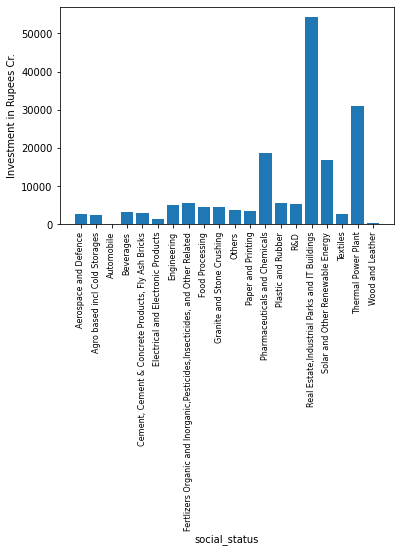

In [125]:
all_time_data.groupby(['sector']).sum()

sector_keys = [status for status, all_time_data in all_time_data.groupby(['sector'])]

plt.bar(sector_keys,all_time_data.groupby(['sector']).sum()['investment'])
plt.ylabel('Investment in Rupees Cr.')
plt.xlabel('social_status')
plt.xticks(sector_keys, rotation='vertical', size=8)
plt.show()

In [130]:
all_time_data.dtypes

district_name                          object
mandal_name                            object
village_name                           object
name_of_the_unit                       object
line_of_activity                       object
sector                                 object
investment                            float64
number_of_employees                     int64
application_date               datetime64[ns]
approval_date                  datetime64[ns]
progress_of_implementation             object
is_online                              object
social_status                          object
district                               object
mandal                                 object
village                                object
unit_name                              object
in_online                              object
Year                                    int64
Time Taken                    timedelta64[ns]
dtype: object

<AxesSubplot:>

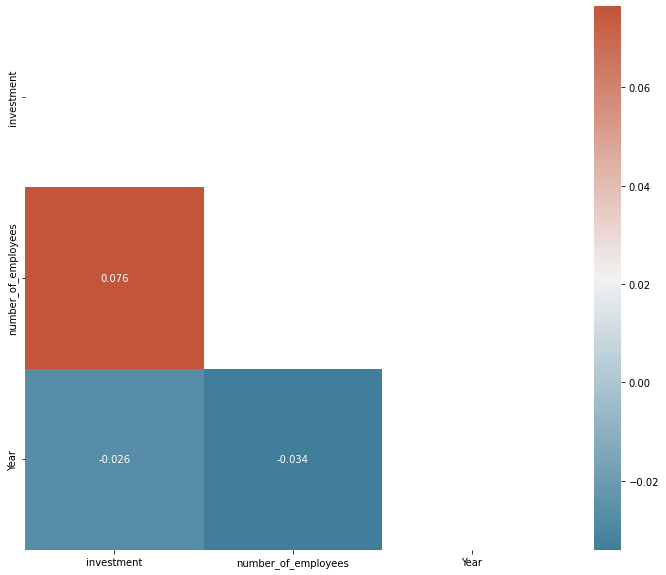

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
#
#
data_cols = list(all_time_data.columns)
df = all_time_data
df.columns = data_cols
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)